In [1]:
# pip install nltk
# nltk.download('punkt')
# nltk.download('punkt')
# nltk.download('stopwords')


In [2]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd



'''Visualisation'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from nltk.tokenize import word_tokenize
import nltk


In [3]:
# print("NumPy version:", numpy.__version__)
# print("Pandas version:", pd.__version__)

In [4]:

df=pd.read_csv('ai.csv')
df.head()


,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,Payment issue for my SmartWatch V2. I was unde...,Billing Problem,Medium,SmartWatch V2
1,2,Can you tell me more about the UltraClean Vacu...,General Inquiry,NaN,UltraClean Vacuum
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,Wrong Item,Medium,SoundWave 300
3,4,Facing installation issue with PhotoSnap Cam. ...,Installation Issue,Low,PhotoSnap Cam
4,5,Order #30903 for Vision LED TV is 13 days late...,Late Delivery,NaN,Vision LED TV


In [5]:
df.describe()

,ticket_id
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticket_id      1000 non-null   int64 
 1   ticket_text    945 non-null    object
 2   issue_type     924 non-null    object
 3   urgency_level  948 non-null    object
 4   product        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


# Checking null values

In [7]:

null_counts_per_column = df.isnull().sum()
null_counts_per_column

ticket_id         0
ticket_text      55
issue_type       76
urgency_level    52
product           0
dtype: int64

In [8]:

df['urgency_level']=df['urgency_level'].fillna('Medium')

In [9]:
df['urgency_level'].value_counts()


urgency_level
Medium    371
High      330
Low       299
Name: count, dtype: int64

In [10]:
df['issue_type'].value_counts()


issue_type
Billing Problem       146
General Inquiry       146
Account Access        143
Installation Issue    142
Product Defect        121
Wrong Item            114
Late Delivery         112
Name: count, dtype: int64

In [11]:
df['issue_type']=df['issue_type'].fillna('Unknown')

In [12]:
df2=df

In [13]:
df.dropna(inplace=True)

null_counts_per_column = df.isnull().sum()
null_counts_per_column

ticket_id        0
ticket_text      0
issue_type       0
urgency_level    0
product          0
dtype: int64

# No null value exist

# Text processing

In [14]:
df['ticket_text'].head()

0    Payment issue for my SmartWatch V2. I was unde...
1    Can you tell me more about the UltraClean Vacu...
2    I ordered SoundWave 300 but got EcoBreeze AC i...
3    Facing installation issue with PhotoSnap Cam. ...
4    Order #30903 for Vision LED TV is 13 days late...
Name: ticket_text, dtype: object

In [15]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [16]:
# 1. Lowercase original text strings


df['ticket_text'] = df['ticket_text'].str.lower()

# 2. Tokenize the lowercase text
df['ticket_text'] = df['ticket_text'].apply(word_tokenize)

# 3. Join tokens back into strings
df['ticket_text'] = df['ticket_text'].apply(lambda tokens: ' '.join(tokens))

In [17]:
df['ticket_text'].head()

0    payment issue for my smartwatch v2 . i was und...
1    can you tell me more about the ultraclean vacu...
2    i ordered soundwave 300 but got ecobreeze ac i...
3    facing installation issue with photosnap cam ....
4    order # 30903 for vision led tv is 13 days lat...
Name: ticket_text, dtype: object

In [18]:
# Remove stop word
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# Download stopwords and tokenizer (only once)


# Define English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())  # tokenize and lowercase
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered)



# Apply stopword removal
df['ticket_text'] = df['ticket_text'].apply(remove_stopwords)


In [19]:
df

,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,payment issue smartwatch underbilled order,Billing Problem,Medium,SmartWatch V2
1,2,tell ultraclean vacuum warranty also available...,General Inquiry,Medium,UltraClean Vacuum
2,3,ordered soundwave got ecobreeze ac instead ord...,Wrong Item,Medium,SoundWave 300
3,4,facing installation issue photosnap cam setup ...,Installation Issue,Low,PhotoSnap Cam
4,5,order vision led tv days late ordered march al...,Late Delivery,Medium,Vision LED TV
...,...,...,...,...,...
994,995,item stock,General Inquiry,High,RoboChef Blender
995,996,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC
996,997,ordered soundwave got powermax battery instead...,Wrong Item,Low,SoundWave 300
998,999,payment issue fr mi soundwave debited incorrec...,Billing Problem,Low,SoundWave 300


# Vectorization

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer = CountVectorizer()

# Vectorize

X = vectorizer.fit_transform(df['ticket_text'])

# Sum counts of each word across all rows (axis=0)
word_counts = X.toarray().sum(axis=0)

# Create a DataFrame with words and their counts
words_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': word_counts
})

# Sort descending by count and get top 10
top_10 = words_freq.sort_values(by='count', ascending=False).head(5)

top_10

,word,count
62,order,375
43,issue,290
4,also,278
36,got,258
21,days,208


In [22]:
df['text_length_chars'] = df['ticket_text'].apply(len)
df

,ticket_id,ticket_text,issue_type,urgency_level,product,text_length_chars
0,1,payment issue smartwatch underbilled order,Billing Problem,Medium,SmartWatch V2,42
1,2,tell ultraclean vacuum warranty also available...,General Inquiry,Medium,UltraClean Vacuum,52
2,3,ordered soundwave got ecobreeze ac instead ord...,Wrong Item,Medium,SoundWave 300,55
3,4,facing installation issue photosnap cam setup ...,Installation Issue,Low,PhotoSnap Cam,56
4,5,order vision led tv days late ordered march al...,Late Delivery,Medium,Vision LED TV,85
...,...,...,...,...,...,...
994,995,item stock,General Inquiry,High,RoboChef Blender,10
995,996,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC,62
996,997,ordered soundwave got powermax battery instead...,Wrong Item,Low,SoundWave 300,101
998,999,payment issue fr mi soundwave debited incorrec...,Billing Problem,Low,SoundWave 300,58


In [23]:
# Sentmental Analysis
from textblob import TextBlob
import pandas as pd


df['polarity'] = df['ticket_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


# First calculate polarity
df['polarity'] = df['ticket_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Then convert to Positive/Negative using loc instead of direct indexing
# This avoids KeyError by using DataFrame's built-in methods that handle indices properly
df['polarity_category'] = 'Neutral'

df.loc[df['polarity'] > 0.7, 'polarity_category'] = 'Positive'
df.loc[df['polarity'] < 0.4, 'polarity_category'] = 'Negative'

In [24]:
df1=df
df1['polarity_category'].value_counts()

polarity_category
Negative    937
Neutral       8
Name: count, dtype: int64

In [25]:
df1['issue_type'].value_counts()

issue_type
Account Access        140
Billing Problem       136
General Inquiry       136
Installation Issue    134
Product Defect        115
Wrong Item            108
Late Delivery         102
Unknown                74
Name: count, dtype: int64

 # Random Forest Tree Classification on urgency_level	

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ticket_text'])


In [27]:
# Label encoding
from sklearn.preprocessing import LabelEncoder





# Initialize encoder
encoder = LabelEncoder()





# Fit and transform
df1['issue_type'] = encoder.fit_transform(df1['issue_type'])

df1['product'] = encoder.fit_transform(df1['product'])

# df1['ticket_text'] = encoder.fit_transform(df1['ticket_text'])
df1['urgency_level'] = encoder.fit_transform(df1['urgency_level'])



# Revesrse transform

In [28]:
l=df['ticket_text'][4]
l

'order vision led tv days late ordered march also contacted support march got response'

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
# X = df1[['issue_type','product','text_length_chars']]

# X = df1[['ticket_text']]

# ticket_text
y = df.urgency_level

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=2)
rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.328042328042328


In [30]:
y_pred

array([2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 2, 2,
       0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0,
       0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0,
       2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2,
       0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2,
       0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [31]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 25, 26],
       [17, 16, 20],
       [14, 25, 24]], dtype=int64)

# Random Forest Tree Classification on Issue type

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
# X = df1[['urgency_level','product','text_length_chars']]
# X = df1[['ticket_text']]
y = df.issue_type

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize and train Random Forest Classifier
rfc1 = RandomForestClassifier(n_estimators=200, random_state=2)
rfc1.fit(X_train, y_train)

# Predict
y_pred = rfc1.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.91005291005291


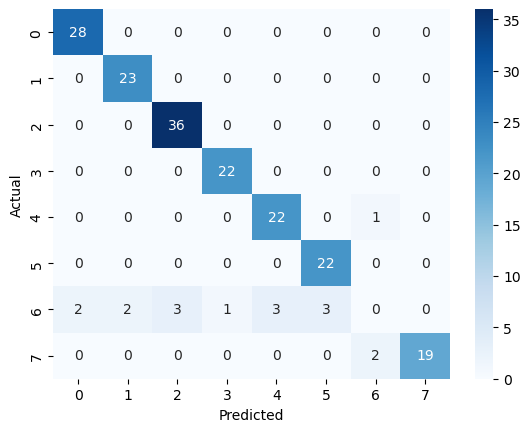

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
a=df['ticket_text'].iloc[35]

In [35]:
# Funtion for text processing

import re
import nltk

def entity(text):
    # --- Extract date entities ---
    date_pattern = r'''
    (
        \b(?:0?[1-9]|[12][0-9]|3[01])       # Day 1-31
        [\/\-]                              # Separator
        (?:0?[1-9]|1[0-2])                  # Month 1-12
        [\/\-]
        (?:\d{4})\b                         # Year (4-digit)
    |
        \b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*   # Month name
        \s+
        (?:0?[1-9]|[12][0-9]|3[01])         # Day 1-31
        ,?\s+
        (?:\d{4})\b                         # Year
    )
    |
    (
        \b(?:0?[1-9]|[12][0-9]|3[01])        # Day
        [/\-]                                # Separator
        (?:0?[1-9]|1[0-2])                   # Month
        [/\-](?:\d{2,4})\b                   # Year
    |
        \b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*   # Month
        \s+(?:0?[1-9]|[12][0-9]|3[01])       # Day
        ,?\s*(?:\d{4})?                      # Optional year
    |
        \b(?:0?[1-9]|[12][0-9]|3[01])        # Day
        \s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*  # Month
        ,?\s*(?:\d{4})?                      # Optional year
    )
'''

    matches = re.findall(date_pattern, text, re.IGNORECASE | re.VERBOSE)
    dates = [match[0] if isinstance(match, tuple) else match for match in matches]





    
    # --- Extract named entities ---




    
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    chunks = nltk.ne_chunk(pos_tags)

    named_entities = []
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            entity_text = ' '.join(c[0] for c in chunk)
            entity_type = chunk.label()
            named_entities.append((entity_type, entity_text))



    # Get orderCode
    pattern = r"#\d+"

    order = re.findall(pattern, text)


    # Combine all results into a structured output
    return {
        "dates": dates,
        "named_entities": named_entities,
        'order number':order
    }


In [36]:
a= "We met on 27/05/2025 and again on June 1, 2025. Delhi, Ravi"

entity(a)

{'dates': ['27/05/2025', 'June 1, 2025'],
 'named_entities': [('PERSON', 'Delhi'), ('PERSON', 'Ravi')],
 'order number': []}

In [37]:
input_text = ["We met on 27/05/2025 and again on June 1, 2025."]
X_new = vectorizer.transform(input_text)  # Vectorize input

pred_encoded = rfc.predict(X_new)  # Predict encoded label
# pred_label = le.inverse_transform(pred_encoded)  # Convert back to original label
pred_encoded

array([2])

In [38]:
# Train encoders 

label0 = LabelEncoder()
label1 = LabelEncoder()

label0.fit(['Low','Medium','High'])
label1.fit(['Billing Problem','General Inquiry','Account Access','Installation Issue','Product Defect','Wrong Item','Late Delivery'])


LabelEncoder()

In [39]:
# Pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Scale features
    ('model', LogisticRegression())          # Step 2: Train model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

In [49]:

def final(text):
    ent_text = text

    # Step 1: Vectorize the input text
    def vec(input_text):
        return vectorizer.transform([input_text])  

    # Step 2: Get the vectorized version
    encoded_text = vec(text)

    # Step 3: Predict using trained models
    prediction_issue = rfc.predict(encoded_text)[0]
    prediction_urgency = rfc1.predict(encoded_text)[0]

    # Step 4: Decode predictions if using LabelEncoder
    prediction_issue = label0.inverse_transform([prediction_issue])[0]
    prediction_urgency = label1.inverse_transform([prediction_urgency])[0]

    # Step 5: Entity extraction
    def ent_out(ent_text):
        final_entity = entity(ent_text)
        return final_entity 

    ent1 = ent_out(ent_text)

    # Step 6: Return results in dictionary
    return {
        "Prediction issue type": prediction_issue,
        "Prediction urgency_level": prediction_urgency,
        "Entities": ent1 
    }

# Example usage
text = (input('Enter your text'))
result = final(text)
print(result)


    

Enter your text order vision led tv days late ordered march also contacted support march got response


{'Prediction issue type': 'Low', 'Prediction urgency_level': 'Late Delivery', 'Entities': {'dates': [], 'named_entities': [], 'order number': []}}


# Convert Output in Json format

In [49]:
import json

# Assume this is the output from your final() function
result = final(text)

# Print dictionary nicely
print(json.dumps(result, indent=4))

{
    "Prediction issue type": "Medium",
    "Prediction urgency_level": "General Inquiry",
    "Entities": {
        "dates": [
            "27/05/2025",
            "June 1, 2025"
        ],
        "named_entities": [
            [
                "PERSON",
                "Delhi"
            ],
            [
                "PERSON",
                "Ravi"
            ]
        ],
        "order number": []
    }
}


# GUI

In [50]:
import tkinter as tk
from tkinter import messagebox

# Assuming these are already defined:
# vectorizer, rfc, rfc1, label0, label1, entity

def final(text):
    ent_text = text

    def vec(input_text):
        return vectorizer.transform([input_text])  

    encoded_text = vec(text)

    prediction_issue = rfc.predict(encoded_text)[0]
    prediction_urgency = rfc1.predict(encoded_text)[0]

    prediction_issue = label0.inverse_transform([prediction_issue])[0]
    prediction_urgency = label1.inverse_transform([prediction_urgency])[0]

    def ent_out(ent_text):
        final_entity = entity(ent_text)
        return final_entity 

    ent1 = ent_out(ent_text)

    return {
        "Prediction issue type": prediction_issue,
        "Prediction urgency_level": prediction_urgency,
        "Entities": ent1 
    }

# ------------------- GUI -------------------
def run_prediction():
    user_input = entry.get("1.0", tk.END).strip()
    if not user_input:
        messagebox.showwarning("Input Error", "Please enter some text.")
        return

    try:
        result = final(user_input)
        output.delete("1.0", tk.END)
        output.insert(tk.END, f"Issue Type: {result['Prediction issue type']}\n")
        output.insert(tk.END, f"Urgency Level: {result['Prediction urgency_level']}\n")
        output.insert(tk.END, f"Entities: {result['Entities']}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create window
window = tk.Tk()
window.title("Text Classifier & Entity Extractor")
window.geometry("500x400")

# Input label + box
tk.Label(window, text="Enter your text:", font=("Arial", 12)).pack(pady=5)
entry = tk.Text(window, height=5, width=60)
entry.pack(pady=5)

# Predict button
tk.Button(window, text="Predict", command=run_prediction, bg="blue", fg="white").pack(pady=10)

# Output label + box
tk.Label(window, text="Results:", font=("Arial", 12)).pack()
output = tk.Text(window, height=10, width=60)
output.pack(pady=5)

# Run the app
window.mainloop()


In [47]:
# pip install gradio


In [51]:
# import gradio as gr
# import re

# # Dummy classifier function (replace with your actual logic)
# def final(text):
#     issue_type = "Network Issue"
#     urgency_level = "High"

#     # Extract dates and ticket numbers
#     dates = re.findall(
#         r'\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* \d{1,2}, \d{4})\b',
#         text, re.IGNORECASE)
#     ids = re.findall(r"#\d+", text)
#     named_entities = []  # Add spaCy/NLTK logic here if needed

#     return f"""Prediction issue type: {issue_type}
# Prediction urgency level: {urgency_level}

# Entities:
#   Dates: {', '.join(dates) or 'None'}
#   Ticket IDs: {', '.join(ids) or 'None'}
#   Named Entities: {', '.join(named_entities) or 'None'}
# """

# # Gradio interface
# iface = gr.Interface(
#     fn=final,
#     inputs=gr.Textbox(label="Enter Text", lines=6, placeholder="Paste your ticket text here..."),
#     outputs=gr.Textbox(label="Analysis Output"),
#     title="Text Classifier & Entity Extractor",
#     description="Paste a support ticket or text and get predictions with extracted entities (dates, ticket IDs, etc)."
# )

# iface.launch()
